# Libraries

In [1]:
library(ggplot2)
library(reshape2)

# Options

In [2]:
options(stringsAsFactors = F)

# Paths

In [3]:
path_in <- getwd()
print(paste("input path is:"
           ,path_in))

[1] "input path is: /Users/MariaSolovey/Documents/Helmholtz/AG_Colome/projects/weigert_antoniolli/analysis/figures_for_paper/GitHub/MassSpec"


# Variables

In [4]:
massSpecType <- c("surface"
                  ,"total")

# Read in data

In [5]:
# read in color scheme
color_scheme <- read.table(paste0(getwd()
                                  ,"/RGB.MS.txt"
                                 )
                           ,header = TRUE
                           ,sep = "\t"
                          )
rownames(color_scheme) <- paste(color_scheme$genotype
                               ,color_scheme$element
                               ,sep = "_")
print(color_scheme)

                    genotype element   R   G   B
WT_dot                    WT     dot   1   1   1
WT_bar                    WT     bar  51  50  50
WT_border                 WT  border   1   1   1
het_dot                  het     dot 105 153 209
het_bar                  het     bar 201 221 243
het_border               het  border   1   1   1
het+RUNX3_dot      het+RUNX3     dot  48  65 154
het+RUNX3_bar      het+RUNX3     bar 140 185 227
het+RUNX3_border   het+RUNX3  border   1   1   1
KO_dot                    KO     dot 237  34  36
KO_bar                    KO     bar 253 224 223
KO_border                 KO  border   1   1   1
KO+RUNX3_dot        KO+RUNX3     dot 159  28  32
KO+RUNX3_bar        KO+RUNX3     bar 246 158 160
KO+RUNX3_border     KO+RUNX3  border   1   1   1
het+ARID1A_dot    het+ARID1A     dot 129 129 129
het+ARID1A_bar    het+ARID1A     bar 212 212 212
het+ARID1A_border het+ARID1A  border   1   1   1


 ## Read in raw data

In [6]:
# list of files
files <- list.files(path_in)
print(files)

 [1] "RGB.MS.txt"                       "anno_Ly1.txt"                    
 [3] "anno_Ly8.txt"                     "counts_norm_Ly1.txt"             
 [5] "counts_norm_Ly8.txt"              "counts_norm_surface_Ly1.txt"     
 [7] "counts_norm_surface_Ly8.txt"      "counts_norm_total_Ly1.txt"       
 [9] "counts_norm_total_Ly8.txt"        "massSpec_FAS_surface_total.ipynb"


In [7]:
cell_lines <- c("Ly1"
               ,"Ly8")

In [8]:
# read in counts
counts <- lapply(cell_lines
                ,function(cell_line){
                    
                    my_counts <- lapply(massSpecType 
                   ,function(method){
                       
                       
                    ifelse(method == "total"
                           ,file_name <- "counts_norm_total"
                           ,file_name <- "counts_norm_surface"
                          )
                       
                       my_file <- files[grepl(file_name
                                       ,files)]
                       my_file <- my_file[grepl(cell_line
                                       ,my_file)]
                       print(my_file)
                       
                       read.table(file = paste0(path_in
                                            ,"/"
                                            ,my_file)
                               ,sep = "\t"
                               ,header = TRUE)
                   })
                    names(my_counts) <- massSpecType
                    
                    my_counts
                })

names(counts) <- cell_lines 

print(str(counts))
print(head(rownames(counts[[1]])))

[1] "counts_norm_surface_Ly1.txt"
[1] "counts_norm_total_Ly1.txt"
[1] "counts_norm_surface_Ly8.txt"
[1] "counts_norm_total_Ly8.txt"
List of 2
 $ Ly1:List of 2
  ..$ surface:'data.frame':	1 obs. of  9 variables:
  .. ..$ Ly1_nscc_1: num 6339308
  .. ..$ Ly1_nscc_2: num 3021715
  .. ..$ Ly1_nscc_3: num 2847404
  .. ..$ Ly1_het_1 : int 684262
  .. ..$ Ly1_het_2 : int 356996
  .. ..$ Ly1_het_3 : int 467232
  .. ..$ Ly1_KO_1  : int 25230
  .. ..$ Ly1_KO_2  : int 0
  .. ..$ Ly1_KO_3  : int 190843
  ..$ total  :'data.frame':	1 obs. of  9 variables:
  .. ..$ Ly1_nscc_1: num 3041320
  .. ..$ Ly1_nscc_2: num 2904800
  .. ..$ Ly1_nscc_3: int 3136342
  .. ..$ Ly1_het_1 : int 310258
  .. ..$ Ly1_het_2 : int 207010
  .. ..$ Ly1_het_3 : int 244091
  .. ..$ Ly1_KO_1  : int 65569
  .. ..$ Ly1_KO_2  : int 40577
  .. ..$ Ly1_KO_3  : int 41319
 $ Ly8:List of 2
  ..$ surface:'data.frame':	1 obs. of  12 variables:
  .. ..$ Ly8_nscc_1: num 1523080
  .. ..$ Ly8_nscc_2: int 2332444
  .. ..$ Ly8_nscc_3: int 229

In [9]:
# read in anno
anno <- lapply(cell_lines 
              ,function(cell_line ){
                  
                  my_anno <- lapply(massSpecType
                   ,function(method){
                       my_file <- files[grepl("anno_"
                                       ,files)]
                       my_file <- my_file[grepl(cell_line
                                       ,my_file)]
                       print(my_file)
                       
                       read.table(file = paste0(path_in
                                            ,"/"
                                            ,my_file)
                               ,sep = "\t"
                               ,header = TRUE)
                   })
                  
                  names(my_anno) <- massSpecType
                  my_anno
              })

names(anno) <- cell_lines 


print(str(anno))
print(head(rownames(anno[[1]])))

[1] "anno_Ly1.txt"
[1] "anno_Ly1.txt"
[1] "anno_Ly8.txt"
[1] "anno_Ly8.txt"
List of 2
 $ Ly1:List of 2
  ..$ surface:'data.frame':	9 obs. of  4 variables:
  .. ..$ sample_ID: chr [1:9] "Ly1_nscc" "Ly1_nscc" "Ly1_nscc" "Ly1_het" ...
  .. ..$ clone    : chr [1:9] "Ly1_nscc" "Ly1_nscc" "Ly1_nscc" "Ly1_het" ...
  .. ..$ cell_line: chr [1:9] "Ly1" "Ly1" "Ly1" "Ly1" ...
  .. ..$ genotype : chr [1:9] "nscc" "nscc" "nscc" "het" ...
  ..$ total  :'data.frame':	9 obs. of  4 variables:
  .. ..$ sample_ID: chr [1:9] "Ly1_nscc" "Ly1_nscc" "Ly1_nscc" "Ly1_het" ...
  .. ..$ clone    : chr [1:9] "Ly1_nscc" "Ly1_nscc" "Ly1_nscc" "Ly1_het" ...
  .. ..$ cell_line: chr [1:9] "Ly1" "Ly1" "Ly1" "Ly1" ...
  .. ..$ genotype : chr [1:9] "nscc" "nscc" "nscc" "het" ...
 $ Ly8:List of 2
  ..$ surface:'data.frame':	12 obs. of  4 variables:
  .. ..$ sample_ID: chr [1:12] "Ly8_nscc" "Ly8_nscc" "Ly8_nscc" "Ly8_het" ...
  .. ..$ clone    : chr [1:12] "Ly8_nscc" "Ly8_nscc" "Ly8_nscc" "Ly8_het" ...
  .. ..$ cell_line: c

# Process Data

In [10]:
colors_bar <- c("WT" = rgb(color_scheme["WT_bar",]$R
                        ,color_scheme["WT_bar",]$G
                        ,color_scheme["WT_bar",]$B
                         ,maxColorValue = 255
                        )
                ,"het" = rgb(color_scheme["het_bar",]$R
                        ,color_scheme["het_bar",]$G
                        ,color_scheme["het_bar",]$B
                         ,maxColorValue = 255
                        )
                ,"KO" = rgb(color_scheme["KO_bar",]$R
                        ,color_scheme["KO_bar",]$G
                        ,color_scheme["KO_bar",]$B
                         ,maxColorValue = 255
                        )
                ,"her +\nARID1A" = rgb(color_scheme["het+ARID1A_bar",]$R
                        ,color_scheme["het+ARID1A_bar",]$G
                        ,color_scheme["het+ARID1A_bar",]$B
                         ,maxColorValue = 255
                        )
               )
print(colors_bar)

           WT           het            KO her +\nARID1A 
    "#333232"     "#C9DDF3"     "#FDE0DF"     "#D4D4D4" 


In [11]:
colors_dot <- c("WT" = rgb(color_scheme["WT_dot",]$R
                        ,color_scheme["WT_dot",]$G
                        ,color_scheme["WT_dot",]$B
                         ,maxColorValue = 255
                        )
                ,"het" = rgb(color_scheme["het_dot",]$R
                        ,color_scheme["het_dot",]$G
                        ,color_scheme["het_dot",]$B
                         ,maxColorValue = 255
                        )
                ,"KO" = rgb(color_scheme["KO_dot",]$R
                        ,color_scheme["KO_dot",]$G
                        ,color_scheme["KO_dot",]$B
                         ,maxColorValue = 255
                        )
                ,"her +\nARID1A" = rgb(color_scheme["het+ARID1A_dot",]$R
                        ,color_scheme["het+ARID1A_dot",]$G
                        ,color_scheme["het+ARID1A_dot",]$B
                         ,maxColorValue = 255
                        )
               )
print(colors_dot)

           WT           het            KO her +\nARID1A 
    "#010101"     "#6999D1"     "#ED2224"     "#818181" 


In [12]:
color_border <- rgb(color_scheme["WT_border",]$R
                        ,color_scheme["WT_border",]$G
                        ,color_scheme["WT_border",]$B
                         ,maxColorValue = 255
                        )
print(color_border)

[1] "#010101"


# Plots

[1] "Ly1"
'data.frame':	18 obs. of  3 variables:
 $ counts  : num  6339308 3021715 2847404 684262 356996 ...
 $ genotype: Ord.factor w/ 3 levels "WT"<"het"<"KO": 1 1 1 2 2 2 3 3 3 1 ...
 $ method  : chr  "surface" "surface" "surface" "surface" ...
NULL
        mean         sd genotype  method      sample
1 4069475.91 1967663.49       WT surface  WT_surface
2  502830.00  166511.78      het surface het_surface
3   72024.33  103670.37       KO surface  KO_surface
4 3027487.43  116389.05       WT   total    WT_total
5  253786.33   52302.36      het   total   het_total
6   49155.00   14219.78       KO   total    KO_total


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_errorbar(data = df_means, aes(x = method, min = mean - sd, :
“Ignoring unknown aesthetics: fill”


[1] "Ly8"
'data.frame':	24 obs. of  3 variables:
 $ counts  : num  1523080 2332444 2299863 1139535 1140872 ...
 $ genotype: Ord.factor w/ 4 levels "WT"<"het"<"KO"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ method  : chr  "surface" "surface" "surface" "surface" ...
NULL
       mean        sd      genotype  method                sample
1 2051795.7 458170.88            WT surface            WT_surface
2 1357245.7 375928.65           het surface           het_surface
3  154787.3 133193.12            KO surface            KO_surface
4 2352902.5 423304.87 het +\nARID1A surface het +\nARID1A_surface
5 2015740.6  73296.48            WT   total              WT_total
6 1513069.8 107839.30           het   total             het_total
7  208016.7 114136.33            KO   total              KO_total
8 1942103.0  58506.71 het +\nARID1A   total   het +\nARID1A_total


Warning message in geom_errorbar(data = df_means, aes(x = method, min = mean - sd, :
“Ignoring unknown aesthetics: fill”


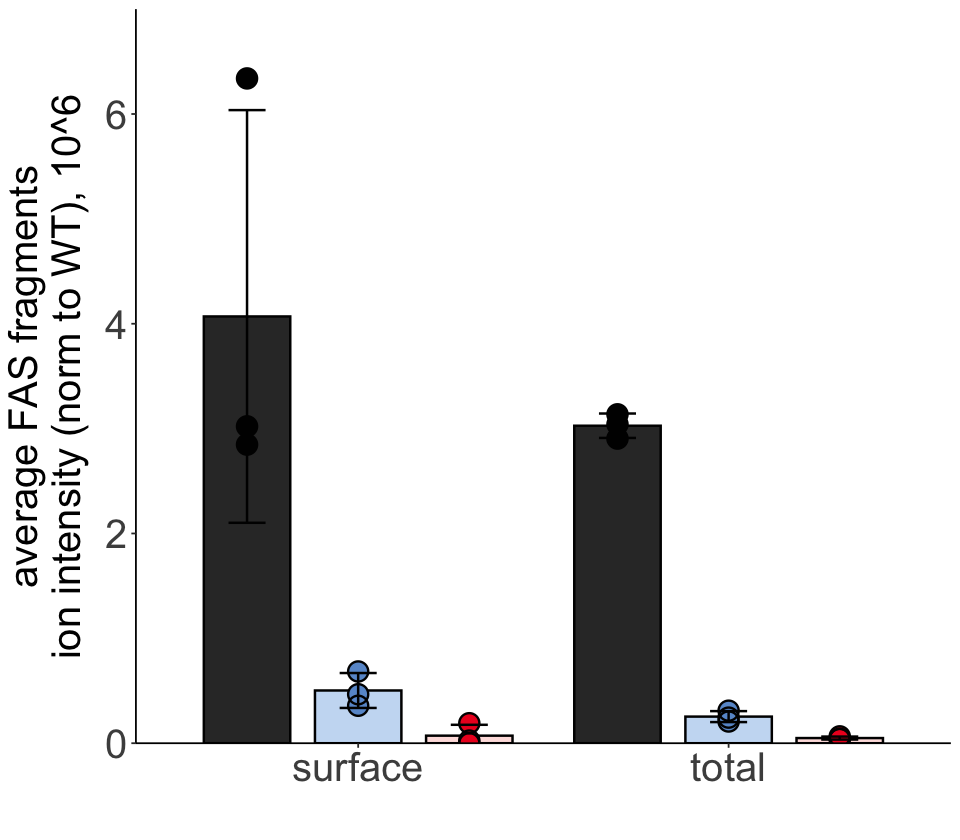

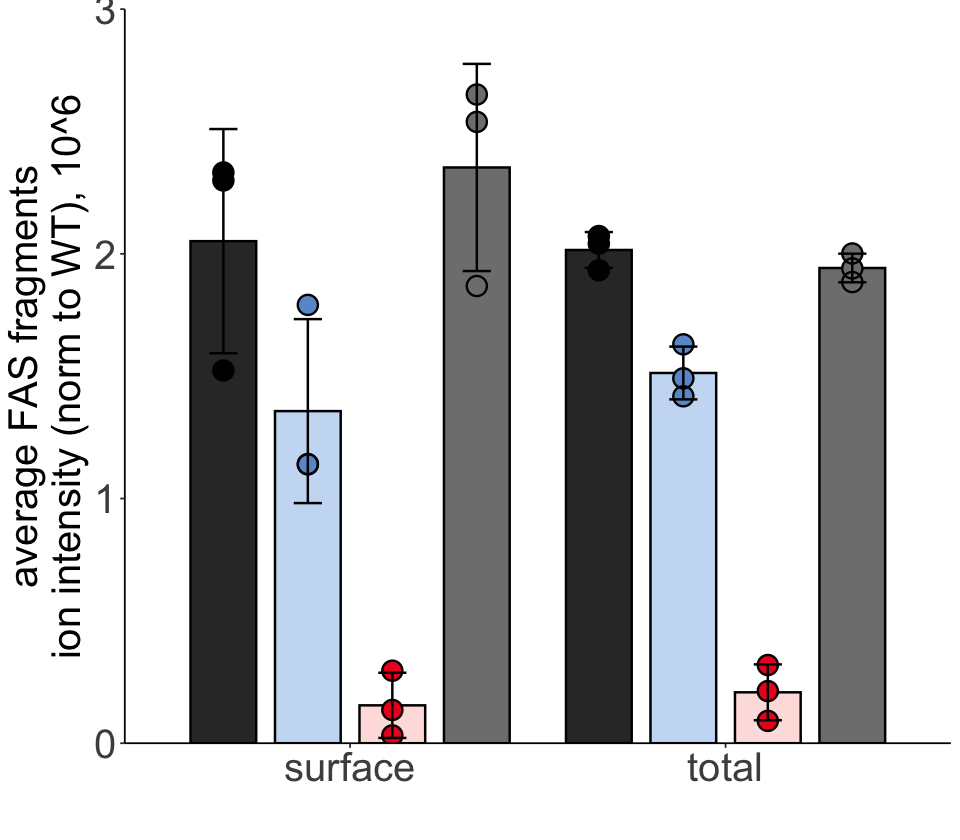

In [13]:
# plot FAS expression by group

#dev.off()
for(cell_line in cell_lines
       ){
    print(cell_line)
    
    # subset
    my_counts <- counts[[cell_line]]
    my_counts_FAS <- as.data.frame(t(t(unlist(my_counts))))
    colnames(my_counts_FAS) <- "counts"
    #print(my_counts_FAS)
    #print(rownames(my_counts_FAS))
    
    my_counts_FAS$genotype <- gsub(".*[_](.+)[_].*", "\\1"
                     ,rownames(my_counts_FAS))              
    my_counts_FAS$method <- sub("[.].*"
                               ,""
                               ,rownames(my_counts_FAS))
    #print(my_counts_FAS)

    df <- my_counts_FAS
        df$genotype <- sapply(df$genotype
                             ,function(var){
                                 if(grepl("nscc"
                                         ,var)){
                                     "WT"
                                 } else if (grepl("het"
                                                 ,var)){
                                     "het"
                                 } else if (grepl("KO"
                                                 ,var)){
                                     "KO"
                                 } else if(grepl("rsc"
                                                ,var)){
                                     "het +\nARID1A"
                                 } 
                             })
        ifelse(cell_line == "Ly1"
              ,my_levels  <-  c("WT"
                             ,"het"
                             ,"KO"
                            )
               ,my_levels  <-  c("WT"
                             ,"het"
                             ,"KO"
                              ,"het +\nARID1A"
                            )
              )
        
        df$genotype <- factor(df$genotype
                             ,levels = my_levels
                          ,labels = my_levels
                              ,ordered = TRUE
                             )
        
        print(str(df))
        
        # plot
    my_genotypes <- unique(df$genotype)
    my_methods <- unique(df$method)
    df_means <- as.data.frame(matrix(,nrow = length(my_genotypes
                                                   ) * length(my_methods
                                                             )
                                     ,ncol = 5
                                    )
                             )
    colnames(df_means) <- c("mean"
                           ,"sd"
                           ,"genotype"
                           ,"method"
                           ,"sample")
    i <- 1
    
    for(my_meth in my_methods) {
        for(my_gen in my_genotypes){
            
        #print(my_gen)
        #print(my_meth)
            
            idx <- (df$genotype == my_gen) & (df$method == my_meth)
            df_means[i,"mean"] <- mean(df$counts[idx])
            df_means[i,"sd"] <- sd(df$counts[idx])
            df_means[i,"genotype"] <- my_gen
            df_means[i,"method"] <- my_meth
            df_means[i,"sample"] <- paste(my_gen
                                         ,my_meth
                                         ,sep = "_")
            i <- i+1
        }
    }
    ifelse(cell_line == "Ly1"
          ,my_labels <- c("WT"
                          ,"het"
                          ,"KO"
                         )
           ,my_labels <- c("WT"
                          ,"het"
                          ,"KO"
                           ,"het +\nARID1A"
                         )
          )
    df_means$genotype <- factor(df_means$genotype
                               ,levels = #c(
                                   my_genotypes
                                          #,my_genotypes)
                               ,labels = #c(
                                   my_labels
                                          #,my_labels)
                                ,ordered = TRUE
                               )
    df_means$sample <- factor(df_means$sample
                                ,levels = df_means$sample
                                #,labels = c(my_labels
                                #           ,my_labels)
                                 ,ordered = TRUE
                                )
    print(df_means)
    
    seed  <-  2
    fontsize <- 24
    dodge <- position_dodge(width = 0.9)
    
    ifelse(cell_line == "Ly1"
          ,ylim <- c(0,7000000)
          ,ylim <- c(0,3000000))
        
    ifelse(length(my_genotypes) ==3
          ,my_width  <-  6
          ,my_width  <-  8
          )
    
    options(repr.plot.heigth = 4
            ,repr.plot.width = my_width)
    
        p <- ggplot() +
                geom_bar(data = df_means
                         ,aes(x = method#sample
                              ,y = mean
                              ,fill = genotype
                         )
                         ,stat = "identity"
                         ,width = 0.7
                         ,linetype = 1
                         ,lwd = 0.7
                         ,colour=color_border
                         ,position = dodge
                         )+
                scale_fill_manual(values = colors_bar)+
                geom_jitter(data = df
                            ,aes(x = method
                                 ,y = counts
                                 ,color = genotype)
                            ,size = 5
                            ,position = dodge
                          )+
                scale_color_manual(values = colors_dot)+
                geom_jitter(data = df
                            ,aes(x = method
                                 ,y = counts
                                ,fill = genotype)
                           #,fill = NA
                            ,shape = 1
                            ,color = color_border
                            ,size = 5
                            ,stroke = 1
                            ,position =dodge 
                          )+
                geom_errorbar(data = df_means
                              ,aes(x = method
                                   ,min = mean - sd
                                   ,max = mean + sd
                                   ,fill = genotype
                              )
                              ,width=0.3
                              ,lwd = 0.7
                              , colour=color_border
                              , size=1.3
                             ,position = dodge
                             )+
                xlab("")+
                ylab("average FAS fragments\nion intensity (norm to WT), 10^6")+
                scale_y_continuous(expand = c(0,0)
                                  ,labels = function(x) format(x / 1000000)  
                                   ,limits = ylim
                                  ) + # no space to x-axis+ 
                theme_classic() +
                theme(legend.position="none"
                      ,axis.title = element_text(size = fontsize)
                      ,axis.text = element_text(size = fontsize)
                      ,plot.title = element_text(size=fontsize)
                )
    print(p)
}




In [14]:
for(cell_line in cell_lines){
    for(method in my_methods){
        print(cell_line)
        print(method)
        my_counts <- counts[[cell_line]][[method]]
        #print(str(my_counts))
        idx_wt <- grepl("nscc"
                       ,colnames(my_counts))
        print(t.test(x = my_counts[,idx_wt]
                    ,y = my_counts[,!idx_wt]
                     ,alternative = "greater"
                    )
             )
    }
}

[1] "Ly1"
[1] "surface"

	Welch Two Sample t-test

data:  my_counts[, idx_wt] and my_counts[, !idx_wt]
t = 3.314, df = 2.0368, p-value = 0.03914
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 490377.8      Inf
sample estimates:
mean of x mean of y 
4069475.9  287427.2 

[1] "Ly1"
[1] "total"

	Welch Two Sample t-test

data:  my_counts[, idx_wt] and my_counts[, !idx_wt]
t = 34.864, df = 4.1188, p-value = 1.507e-06
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 2701603     Inf
sample estimates:
mean of x mean of y 
3027487.4  151470.7 

[1] "Ly8"
[1] "surface"

	Welch Two Sample t-test

data:  my_counts[, idx_wt] and my_counts[, !idx_wt]
t = 1.7979, df = 8.1901, p-value = 0.05452
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -23802.25       Inf
sample estimates:
mean of x mean of y 
  2051796   1288312 

[1] "Ly8"
[1] "total"

	We